In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\anaconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\ProgramData\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristics:

*Number of Instances:*  
20640

*Number of Attributes:*  
8 numeric, predictive attributes and the target

### Attribute Information:
- *MedInc*: median income in block  
- *HouseAge*: median house age in block  
- *AveRooms*: average number of rooms  
- *AveBedrms*: average number of bedrooms  
- *Population*: block population  
- *AveOccup*: average house occupancy  
- *Latitude*: house block latitude  
- *Longitude*: house block longitude  

### Target
The target variable is the median house value in units of 100,000 for California districts.

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
X_train.shape

(11610, 8)

![Neural Network Diagram](RM_Imagee.jpg)


In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss = "mean_squared_error",
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics = ['mae'])

In [25]:
model_history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3943 - mae: 0.4493 - val_loss: 0.4064 - val_mae: 0.4394
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3923 - mae: 0.4475 - val_loss: 0.4290 - val_mae: 0.4434
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3906 - mae: 0.4466 - val_loss: 0.4194 - val_mae: 0.4376
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3889 - mae: 0.4453 - val_loss: 0.3986 - val_mae: 0.4380
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3873 - mae: 0.4442 - val_loss: 0.3901 - val_mae: 0.4356
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3856 - mae: 0.4435 - val_loss: 0.4061 - val_mae: 0.4344
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3844 - mae: 0.4423 - val_loss: 0.4012 - val_mae: 0.4338
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [26]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 30025.1699 - mae: 154.8190


In [27]:
model_history.history

{'loss': [0.3943287134170532,
  0.392260879278183,
  0.39056074619293213,
  0.3888949155807495,
  0.3873072564601898,
  0.38561171293258667,
  0.3843579590320587,
  0.3829883337020874,
  0.3816116750240326,
  0.38027894496917725,
  0.3792725205421448,
  0.37794122099876404,
  0.37678292393684387,
  0.3756231665611267,
  0.37464019656181335,
  0.3735232651233673,
  0.3726145327091217,
  0.37166276574134827,
  0.370490700006485,
  0.3697839379310608],
 'mae': [0.4492722451686859,
  0.447477787733078,
  0.44664981961250305,
  0.44532519578933716,
  0.4442335367202759,
  0.4435364007949829,
  0.4422949552536011,
  0.44139227271080017,
  0.44080784916877747,
  0.4397895336151123,
  0.4388081729412079,
  0.43770089745521545,
  0.43703022599220276,
  0.43598732352256775,
  0.4356386065483093,
  0.43511322140693665,
  0.4340752959251404,
  0.43330448865890503,
  0.4324326813220978,
  0.43172672390937805],
 'val_loss': [0.40637901425361633,
  0.4290466606616974,
  0.41938138008117676,
  0.39858

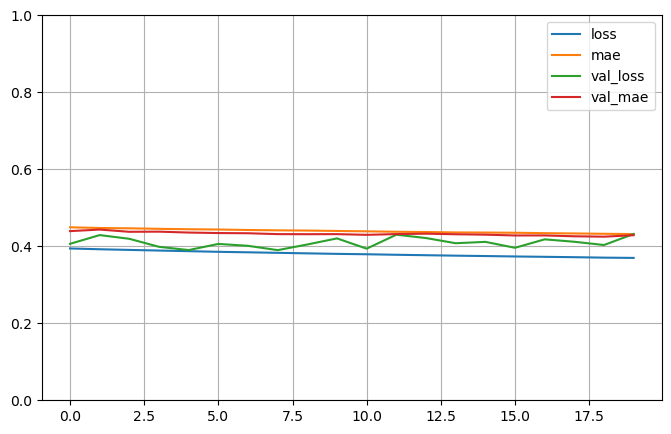

In [28]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
X_new = X_test[:3]

In [30]:
y_pred = model.predict(X_new)                  
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 197ms/step
[[149.40912]
 [164.34145]
 [148.11191]]
[0.477   0.458   5.00001]


In [31]:
del model

In [32]:
keras.backend.clear_session()

## Functional API

In [36]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs=[output])

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 30)                   270       ['input_4[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 30)                   930       ['dense_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_4[0][0]',             
                                                                     'dense_2[0][0]']         

In [38]:
model.compile(loss = "mean_squared_error",
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics = ['mae'])

In [44]:
model_history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3792 - mae: 0.4401 - val_loss: 0.3610 - val_mae: 0.4259
Epoch 2/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3779 - mae: 0.4393 - val_loss: 0.4297 - val_mae: 0.4341
Epoch 3/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3774 - mae: 0.4396 - val_loss: 0.3974 - val_mae: 0.4279
Epoch 4/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3758 - mae: 0.4382 - val_loss: 0.3768 - val_mae: 0.4296
Epoch 5/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3755 - mae: 0.4377 - val_loss: 0.3515 - val_mae: 0.4244
Epoch 6/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3737 - mae: 0.4372 - val_loss: 0.3993 - val_mae: 0.4279
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3737 - mae: 0.4366 - val_loss: 0.3639 - val_mae: 0.4246
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [45]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 754us/step - loss: 21324.0938 - mae: 143.7520


In [46]:
model_history.history

{'loss': [0.3791651129722595,
  0.3779199421405792,
  0.37737831473350525,
  0.3758224546909332,
  0.3754596710205078,
  0.37367740273475647,
  0.3736606538295746,
  0.37251195311546326,
  0.3714843690395355,
  0.3706281781196594,
  0.37035220861434937,
  0.3691158890724182,
  0.3687695562839508,
  0.36765122413635254,
  0.3669997453689575,
  0.3663310408592224,
  0.3651280999183655,
  0.36537042260169983,
  0.36415883898735046,
  0.36359429359436035,
  0.36311763525009155,
  0.36238008737564087,
  0.36166810989379883,
  0.36108213663101196,
  0.36044538021087646,
  0.3601008951663971,
  0.35995352268218994,
  0.3592613935470581,
  0.3588206171989441,
  0.35816359519958496,
  0.35721734166145325,
  0.35702767968177795,
  0.35726189613342285,
  0.35608306527137756,
  0.356071412563324,
  0.3552153706550598,
  0.35529372096061707,
  0.35473746061325073,
  0.35391050577163696,
  0.35342705249786377],
 'mae': [0.4400605857372284,
  0.43932223320007324,
  0.43959736824035645,
  0.4381815791

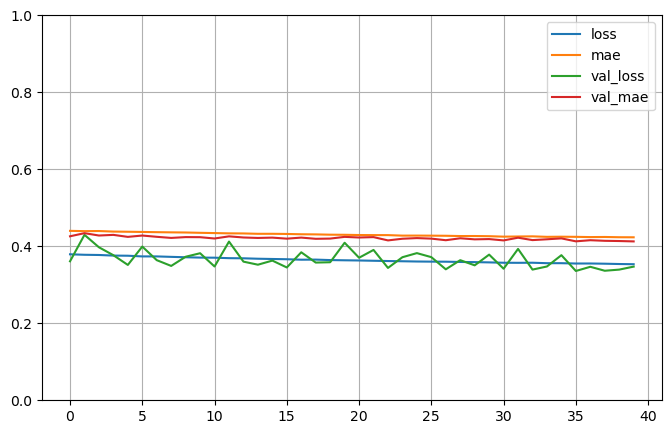

In [47]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Saving and Restoring

In [48]:
model.save("my_func_model.h5")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
%pwd

'C:\\Users\\hp\\Downloads\\Deep Learning'

In [50]:
del model

In [51]:
keras.backend.clear_session()

In [52]:
model = keras.models.load_model("my_func_model.h5")

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 30)                   270       ['input_4[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 30)                   930       ['dense_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_4[0][0]',             
                                                                     'dense_2[0][0]']         

In [54]:
y_pred = model.predict(X_new)
print(y_pred)

1/1 [==============================] - 0s 166ms/step
[[138.0817 ]
 [146.99583]
 [151.09116]]


In [55]:
del model

In [56]:
keras.backend.clear_session()

### Using Callbacks during Training

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [63]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [64]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.0994 - val_loss: 1.1882
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7151 - val_loss: 0.6380
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6317 - val_loss: 0.5768
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5899 - val_loss: 0.5845
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5576 - val_loss: 0.5559
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5298 - val_loss: 0.5099
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5069 - val_loss: 0.4714
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4803
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4706 - val_loss: 0.4530
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4566 - val_loss: 0.4454

In [65]:
del model
keras.backend.clear_session()

In [66]:
model = keras.models.load_model("Model-10.h5")

In [67]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 67096.9141


### Best Model Only

In [68]:
del model
keras.backend.clear_session()

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only = True)

In [72]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.6932 - val_loss: 0.8270
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7516 - val_loss: 0.6691
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6662 - val_loss: 0.6065
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6126 - val_loss: 0.5602
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5701 - val_loss: 0.5217
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5356 - val_loss: 0.4925
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5087 - val_loss: 0.4692
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4878 - val_loss: 0.4520
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4711 - val_loss: 0.4397
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4575 - val_loss: 0.4332

In [74]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 80629.0469


### Best Model Only

In [75]:
del model
keras.backend.clear_session()

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [77]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [78]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_Model.h5", save_best_only = True)

In [81]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
# patience : Number of epochs with no improvement after which training will be stopped.

In [83]:
history = model.fit(X_train, y_train, epochs = 200,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4663 - val_loss: 0.4430
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4567 - val_loss: 0.4457
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4485 - val_loss: 0.4300
Epoch 4/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4415 - val_loss: 0.4394
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4353 - val_loss: 0.4314
Epoch 6/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4299 - val_loss: 0.4335
Epoch 7/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4251 - val_loss: 0.4429
Epoch 8/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4209 - val_loss: 0.4293
Epoch 9/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4172 - val_loss: 0.4257
Epoch 10/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4138 - val_lo

In [86]:
model = keras.models.load_model("early_stop_Model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 86827.9844
